In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
from scipy.stats import mode

In [2]:
full_data = np.load("full_data.npz")["full_data"]
#full_data = np.load("/content/full_data.npz")["full_data"]

In [3]:
full_data.shape

(5, 101, 101, 4999)

In [4]:
#1 loop through signals to find the mode

#divide array in to each run, so the array is one dimension

# Assuming 'data' is your 4D array of shape (1, 101, 101, 4999)
# Initialize an empty list to store the modes for each (x, y) coordinate
modes = []
selected_data = full_data[0] 

In [5]:
# Loop through each (x, y) coordinate to find the mode of each signal
for x in range(selected_data.shape[0]):
    for y in range(selected_data.shape[1]):
        # Find the mode along the last dimension (the signal at each x, y coordinate)
        signal_mode = mode(selected_data[ x, y], axis=None).mode
        modes.append(signal_mode)

modes_array = np.array(modes)
print("Modes array:", modes_array)

Modes array: [50.      60.15625 60.15625 ... 39.84375 50.       0.     ]


In [62]:
# Choose a specific pixel (x, y) for visualization
x, y = 50,50  # Example coordinates, adjust as needed

# Extract the signal for the chosen pixel
signal = selected_data[x, y]
signal_std = np.std(signal)

Signal at pixel (50, 50): [  0.78125  58.59375 110.9375  ...  80.46875  18.75     50.     ]


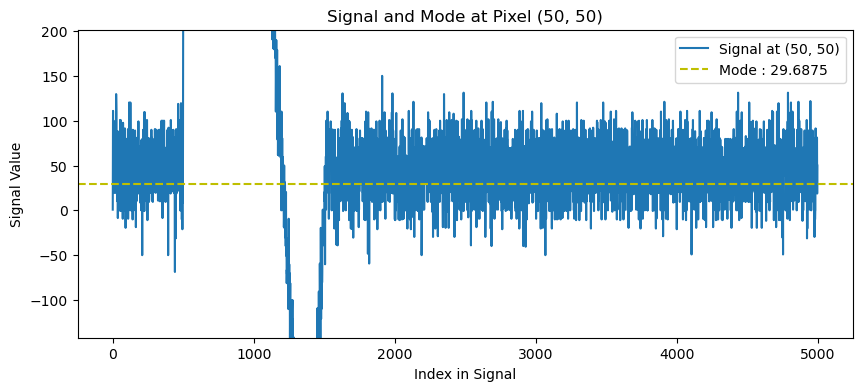

In [64]:
# Print the signal values
print(f"Signal at pixel ({x}, {y}): {signal}")

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(signal, label=f"Signal at ({x}, {y})")
mode_val = mode(signal, axis=None).mode
plt.axhline(y=mode_val, color='y', linestyle='--', label=f'Mode : {mode_val}')
plt.xlabel("Index in Signal")
plt.ylabel("Signal Value")
plt.ylim(mode_val-(signal_std/2), mode_val+(signal_std/2))
plt.title(f"Signal and Mode at Pixel ({x}, {y})")
plt.legend()
plt.show()

### TEST CODE FOR STANDARDIZED ANOMALIES 

In [67]:
def standardized_anoms(ds):

    '''This function takes in a dataset and computes the standardized anomalies 
    A standardized anomaly, also known as a normalized anomaly, is a way to express
    data that has seasonal variations by dividing anomalies by the (climatological) standard deviation. 
    This process removes the influence of dispersion and provides more information about 
    the magnitude of the anomalies

    Argument
    -------
    ds : input dataset 

    Return
    ------
    std_anom
    
    '''
    anoms = ds - np.mean(ds)
    std_anom = anoms/np.std(ds)

    return std_anom

In [69]:
def sel_loc_plot_dist(data, x, y, run_num):
    # Import seaborn for creating advanced statistical visualizations
    import seaborn as sb

    # Extract the data values for the specified location (y, x) across all runs
    dist_data = data[y, x, :]

    # Create a figure with two subplots arranged in one row and two columns
    pp, axes = plt.subplots(ncols=2, figsize=(15, 4))

    # Define titles for the two plots
    titles = [f'(a) Mean for Run {run_num}', f'(b) Distribution for Loc. {x, y}']

    # Loop through each subplot and assign its title
    for (nx, axs), tt in zip(enumerate(axes.flat), titles):
        
        if nx == 0:  # First subplot: Contour plot of mean values
            # Calculate the mean across all runs (3rd dimension) to get a 2D array
            d2p = np.mean(data, axis=2)
            
            # Create a filled contour plot with defined levels
            pp = axs.contourf(d2p, levels=np.arange(-4500, 500, 100))
            
            # Mark the specified location (x, y) on the plot with a red dot
            axs.scatter(x, y, color='red')
            
            # Add a color bar to provide a reference for the contour levels
            plt.colorbar(pp)
            
            # Set the y-axis limits (inverted to match the typical matrix view)
            axs.set_ylim(100, 0)
        
        else:  # Second subplot: KDE plot of distribution at the specified location
            # Use seaborn to create a kernel density estimate (KDE) plot of the data
            sb.kdeplot(ax=axs, data=dist_data, color='blue')
        
        # Set the title of the current subplot, aligned to the left
        axs.set_title(tt, loc='left')


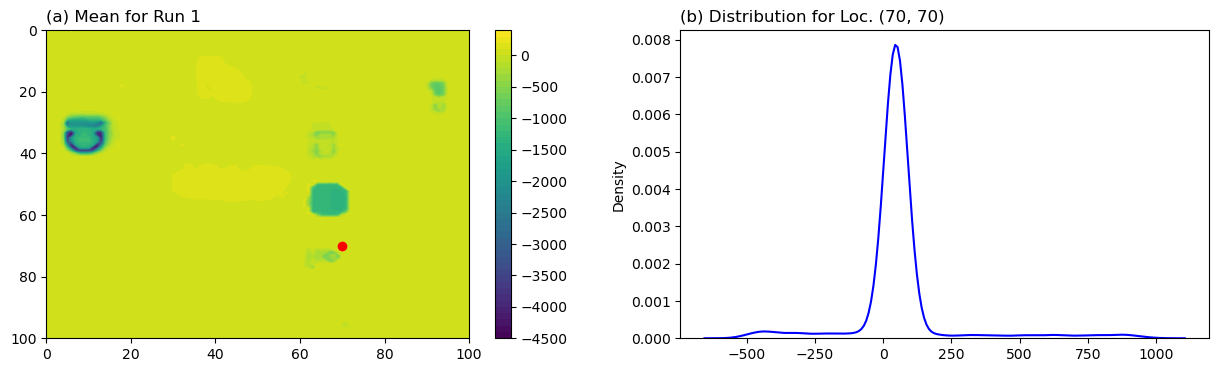

In [97]:
sel_loc_plot_dist(selected_data,70,70,1)

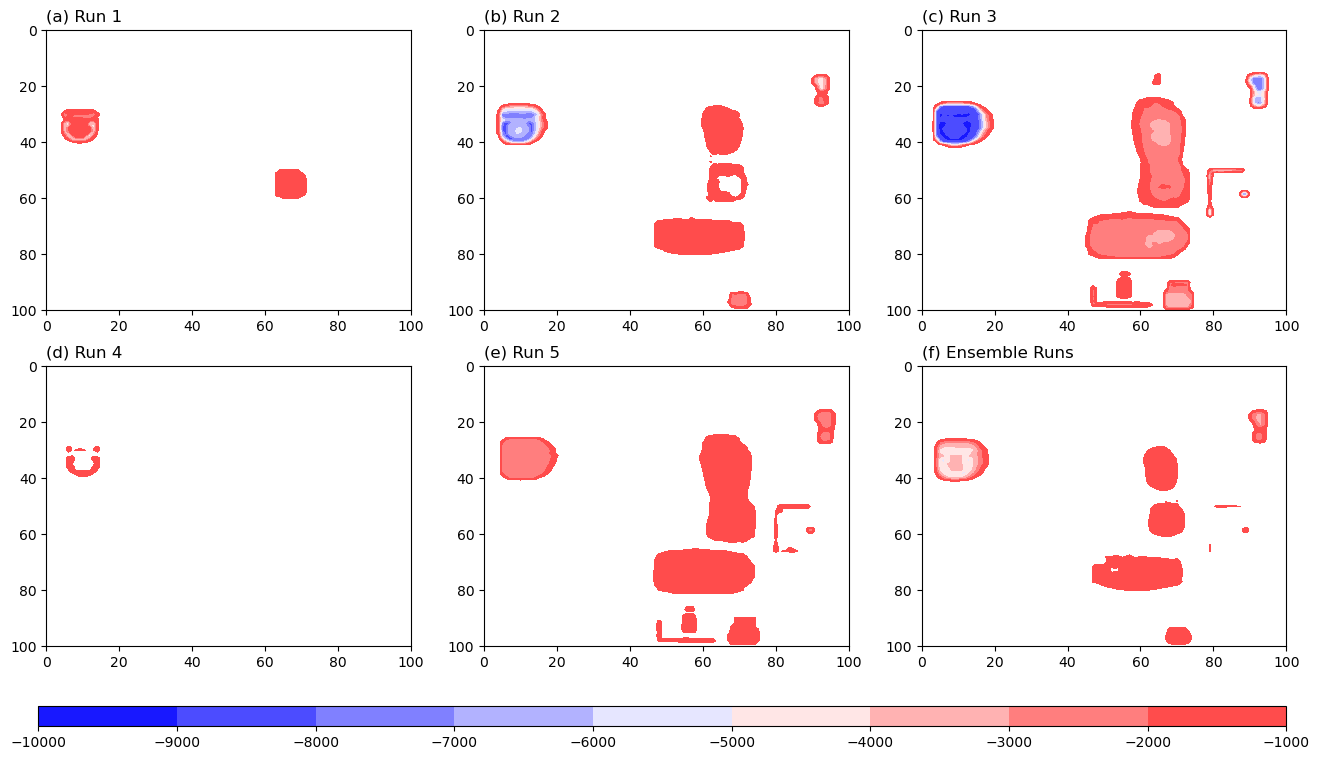

In [87]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize=(16,8))
titles = ['a','b','c','d','e','f']

for (ix,ax) in enumerate(axes.flat):

    if ix < 5:
        d2p = np.nanmean(full_data[ix,:,:,:],axis=2) 
        _ti = f'Run {ix+1}'
    else:
        d2p = np.nanmean(np.nanmean(full_data,axis=3),axis=0) 
        _ti = f'Ensemble Runs'

    pp = ax.contourf(d2p, vmin=-10000,vmax=0,cmap='bwr', levels=np.arange(-10000,0,1000))

    ax.set_title(f'({titles[ix]}) {_ti}', loc='left')
    ax.set_ylim(100,0)
#add cbar axis
cbar_ax = fig.add_axes([0.12, 0.01, 0.78, 0.025])
fig.colorbar(pp, cax=cbar_ax, orientation='horizontal')